In [1]:
import numpy as np
from ipywidgets import interact, IntSlider
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot','seaborn-notebook'])
from tqdm import tqdm

# The Travelling Salesman Problem

<br />

Colin Valentini & Su Hang

November 11, 2016

## Outline

- What is the Travelling Salesman Problem (TSP)?
- Why do we care? Why should *you* care?
- Bibliography
- Solutions vs. heuristics
- Lin-Kernighan Heuristics et al.
    - Standard, Mak & Morton, Chained LK
- The Ant Colony System
- The Future

## What is the Travelling Salesman Problem?

Given a set of cities, what's the fastest way to visit each city exactly once and then return home?

Complete (di)graph $G = (V, E)$

**Cities**
$$V = \{v_i\}_{i=1}^n$$

**Paths between each possible city pair**

\begin{align}
E &= \{e_j\}_{j=1}^m 
\\
m &=
\begin{cases}
\frac{n (n-1)}{2} & \text{symmetric TSP, undirected edges} \\
n (n-1) & \text{asymmetric TSP, directed edges}
\end{cases}
\end{align}

**Cost vector**

\begin{align}
c &\in \mathbb{R}^m \\
m &=
\begin{cases}
c_{ab} = c_{ba}  & \text{symmetric TSP, undirected edges} \\
c_{ab} \neq c_{ba} & \text{asymmetric TSP, directed edges}
\end{cases}
\end{align}

Today, we restrict ourselves to the **symmetric** case.

**Tour vectors**

$$\mathbf{x} \in \{0,1\}^m
\quad\text{where }
x_{j} =
\begin{cases}
1 & e_j \text{ in tour} \\
0 & e_j \text{ not in tour}
\end{cases}
$$

**All possible tour vectors**

$$\mathbf{x} \in S \quad \text{and} \quad |S| = \frac{(n-1)!}{2}$$

**Objective function**
$$
\underset{\mathbf{x} \in S}{\arg\min} ~ \mathbf{c}^\top \mathbf{x}
$$

such that

Each city $v$ participates in 2 edges

$$
\sum_{e: v \in e} x_e = 2 \quad \forall \, \mathbf{x} \in S
$$

Subtour constraint

$$
W = \{ e = (u,v) : ~ ( u \in Q \cap v \in Q^c ) \cup ( u \in Q^c \cap v \in Q ) \} \\
\sum_{w \in W} x_w \geq 2 \quad \forall Q \subset V, ~ Q \neq \emptyset
$$

### TSP et al.

- Travelling Purchaser Problem
- Quadratic Assignment Problem

## Why do we care?

Colin
- Loves computer science
- Traumatic experience waiting to board planes

Su
- Also a CS Major in Intelligent Systems track
- Part of research is on reinforcement learning

## Why should *you* care?

<center>
<img src="http://imgs.xkcd.com/comics/travelling_salesman_problem.png" />
<p style="text-align: center; font-size: 0.5em;">http://xkcd.com/399/</p>
</center>

### Computational complexity
$$
P \overset{?}{=} NP
$$

#### Encryption
<center>
<img src="fig/prime_meme.jpg" />
<p style="text-align: center; font-size: 0.5em;">https://imgflip.com/i/1dl4us</p>
</center>

### Operations Research

Shipping and delivery routes (Amazon, FedEx, UPS, etc)

Circuit board and drilling operations

Plane boarding

## Solutions vs. Heuristics

**Solution** Tour of minimal cost

**Heuristic** Tour of "good enough" cost

As it relates to P?=NP

e.g. (non-)convexity, and the power of "good enough" in machine learning

## Bibliography

<br />

<div style="font-size: 0.5em">

Applegate, D., R. Bixby, V. Chvátal, W. Cook. 2006. The Travelling Salesman Problem: A Computational Study. Princeton, New Jersey.

Deneubourg, J-L., et al. "The self-organizing exploratory pattern of the Argentine ant." Journal of insect behavior 3.2 (1990): 159-168.

Perna, Andrea, et al. "Individual rules for trail pattern formation in Argentine ants (Linepithema humile)." PLoS Comput Biol 8.7 (2012): e1002592.

Dorigo, Marco, and Luca Maria Gambardella. "Ant colony system: a cooperative learning approach to the traveling salesman problem." IEEE Transactions on evolutionary computation 1.1 (1997): 53-66.

Dorigo, Marco. (June 3, 2015). Marco Dorigo Web Site. Retrieved Nov 7, 2016 from http://iridia.ulb.ac.be/~mdorigo/HomePageDorigo/.

Lin, Shen, and Brian W. Kernighan. "An effective heuristic algorithm for the traveling-salesman problem." Operations research 21.2 (1973): 498-516.

Helsgaun, K. 2000. An effective implementation of the Lin-Kernighan traveling salesman heuristic. European Journal of Operational Research 126, 106-130.

Mak K., A. Morton. 1993. A modified Lin-Kernighan traveling-salesman heuristic.  Operations Research Letters 13, 127-132.

Martin, O., S. Otto, E. Felten. 1991. Large-step Markov chains for the traveling salesman problem. Complex Systems 5, 299-326.

Rosenkrantz, Daniel J., Richard E. Stearns, and Philip M. Lewis, II. "An analysis of several heuristics for the traveling salesman problem." SIAM journal on computing 6.3 (1977): 563-581.
</span>

## The Lin-Kernighan Heuristic

### Overview

The Lin-Kernighan Heuristic (LK) is one of the most popular TSP heuristics

1973, Bell Labs, by Shen Lin and Brian Kernighan

Dominant heuristic approach for 15 years

Most modern heuristics have (LK) at their core

#### Fun Facts about Kernighan

Co-authored *the* book on C, The C Programming Language Manual

Co-created the AWK programming language with Prof. Alfred Aho (of Columbia CS Theory and "Dragon Book" fame)

### How does Lin-Kernighan work?

Can we find a set of $k$ edges in a given tour $T$ and replace them with another set of $k$ edges not in $T$ to get a tour with less cost?

### $k$-Optimality
Motivation & Intuition for Lin-Kernighan

Tour $T$ is **$k$-optimal** if it's impossible to obtain a tour of less cost by swapping $k$ edges in $T$ with any other $k$ edges in $T^C$.

A **$k$-opt** is a swapping operation that removes $k$ edges $\left\{e_j \in T\right\}_{j=1}^k$ and replaces them with another, *disjoint*, set of $k$ edges $\left\{f_j \in T^C\right\}_{j=1}^k$.

### Goals & Criteria

LK is a *tour improvement* not a *tour construction* heuristic (assume a starting tour)

Our goal is to find the best sets of edges $X = \{x_1,x_2,...,x_k\}$, $Y = \{y_1,y_2,...,y_k\}$ for some $k$

We'll do this by incrementally considering additional edges

**Gain Criterion:** We only consider a new edge pair $(x_i,y_i)$ if our total improvement $G_i$ is as given below,

$$
G_i = \sum_\limits{j=1}^i{g_j} = \sum_\limits{j=1}^i \left( c_{x_j} - c_{y_j} \right) > 0
$$

**Stopping Criterion:** We stop immediately once $G_i \leq 0$ for some $i$

**Feasibility Criterion:** We only consider a new edge pair if it allows us to maintain a valid tour by "closing up"

<center>
<img src="fig/mak_and_morton_lkh.png" width=1000 />
<p style="text-align: center; font-size: 0.5em;">[Mak and Morton, 1991]</p>
</center>

### Pseudocode for Lin-Kernighan Heuristic

<pre style='font-size: 0.4em; line-height: 1.5;'><code>
T = randomTour(pts)
bigG = 0

while (there are still cities left to be tested) {

    t1 = our starting city
    x1 = one of the edges of t1
    y1 = a suitable replacement edge for x1
        if (no y1 exists) {goto: backtracking}

    bigG = bigG + costDiff(x1, y1)
    i = 2

    while (bigG > 0) {

        x_i = find_next_x(t1, y_(i-1), Y, T)
        y_i = find_next_y(x_i, bigG, X, T)
            if (no y_i exists) {goto: backtracking}

        if (closing up now is best bigG we've seen) {
            k = i   // Record it
         }

         bigG = bigG + costDiff(x_i, y_i)
    }
   t1 = next(t1,T)
}

T' = swap(X,Y,k)
return T'

backtracking: some very involved but not very enlightening backtracking
</code></pre>

### Lin-Kernighan Results

For small-ish sized problems ($N \leq 42$), optimum solutions were achieved in a single trial with probability 1

For all tested instances with $N \leq 110$, the algorithm produced an optimal solution if allowed to run in ~$O(N^2)$

Why $O(N^2)$?

For each city, the search for sets $X$,$Y$ of edges is a slow growing function of $N$, let it be $d(N)$

Updating the tour data structure as we find edges costs a factor of $N$

Since we check each city for possible improvements, we have to contribute another factor of $N$

Hence, the expected runtime is $O(N^2 d(N))$  (observed runtimes grew at approximately $O(N^{2.2})$) 

### Derivatives of the Lin-Kernighan Heuristic

Modified Lin-Kernighan [Mak and Morton, 1991]

Chained Lin-Kernighan [Martin and Felten, 1991]

### Mak & Morton MLK Heuristic

King-Tim Mak & Andrew Morton noticed that the LK heuristic was not being utilized in OR due to its complexity and that even those who did were rarely able to attain the results achieved by LK themselves

They devoloped a simplified version of LK called *Modified Lin-Kernighan*

It is NOT variable *k-opt*, MLK is fixed at 2-opts only

It can be implemented in less than 100 lines of code

### MLK Overview

Fix an edge, then find the best *2-opt* that can be performed by probing other edges as candidates

When a suitable candidate is found, we consider the edges that would be our replacements and choose one to be used as the starting candidate edge in the next iteration.

Rinse and repeat.

<img style="float: left; margin-top:15%" src="fig/mak_and_morton_sym.png" width=500 />
<img style="float: right;" src="fig/mak_and_morton_mlk.png" width=500 />

<center><p style="text-align: center; font-size: 0.5em;">[Mak and Morton, 1993]</p></center>

### Mak & Morton MLK Pseudocode

<pre style='font-size: 0.5em; line-height: 1.5;'><code>
    T = randTour(pts)
    t1 = some city in T
    i = 1
    linkBase = x1 = edge from t1 to t2
    bestGain = 0
    cumGain = []
    
    while (testGain(i) > bestGain) {
    
        probe = bestProbe(linkBase,T)
        z_i = edge(head(linkBase), head(probe))
        y_i = edge(tail(linkBase), tail(probe))
        
        nextlinkBase = lessGainful(z_i, y_i, linkBase, probe)
        T = two_opt(linkBase,probe)
        cumGain[i] = cumGain[i] + costDiff(z_i,linkBase) + costDiff(y_i,probe)
        
        bestGain = max(cumGain)
        linkBase = nextlinkBase
        i = i + 1
    }
</code></pre>

### MLK Results

Mak & Morton found that on average, MLK produced tours that were within *2-4%* of the optimal solution

With some refinements (limiting search of probe edge, added backtracking), they were able to achieve an average of at most *2.5%* above optimal

They observed run times that grew with $O(N^{1.5})$, a respectable improvement over LK

### Chained Lin-Kernighan

Lin-Kernighan is great and all, but it could be utilized much more effectively.

Standard LK practice it to perform many trials, each on a random initial tour, and look for the minimum.

What if we feed our resulting tour from an LK run back into LK?

This type of process is referred to as a *Markov chain*

A restriction on Markov chains (in this context) is that the $i^{th}$ tour is constructed only from the $(i-1)^{th}$ tour

LK is a good candidate for this type of procedure because it tends to produce only a small number of distinct tours, close to the optimum

Because they produce so few solutions, they limit the search space dramatically

<center><img src="fig/chained_LK_prob_curve.png" width=800 /></center>

<center><p style="text-align: center; font-size: 0.5em;">[Martin et. all 1991]</p></center>

### Chained Lin-Kernighan Outline

Assume the current tour is called *start*

Kick *start* by applying a double-bridge swap (call this new tour *intermediate*)

Apply Lin-Kernighan to *intermediate* (call this new tour *trial*)

If $cost(trial) < cost(start)$, we continue

Repeat this many times

<center><img src="fig/chained_LK_markov_process.png" width=800 /></center>

<center><p style="text-align: center; font-size: 0.5em;">[Martin et. all 1991]</p></center>

<center><img src="fig/chained_LK_double_bridge.png" width=800 /></center>

<center><p style="text-align: center; font-size: 0.5em;">[Martin et. all 1991]</p></center>

### Chained Lin-Kernighan Results

Tested 20 random scatter Euclidean instances with $N$ = 50, 100, 200, 300, 400, and 500


They observed that an exponential fit of the runtimes gave ~$O(N^{1.5})$ and they predicted worst case at $O(N^2)$

For $N \leq 200$ chained LK found the optimum in less than 5 minutes

## The Ant Colony System

![](fig/deneubourg_1989_no_food.png)
<p style="text-align: center; font-size: 0.5em;">[Deneubourg et al., 1989]</p>

<center><img src="fig/deneubourg_1989_diamond.png" width=800 /></center>
<p style="text-align: center; font-size: 0.5em;">[Deneubourg et al., 1989]</p>

In [2]:
HTML('<center><iframe width="800" height="600" src="https://www.youtube.com/embed/gPK4Oi2x0mQ" frameborder="0" allowfullscreen></iframe></center>')

<p style="text-align: center; font-size: 0.5em;">Network of exploratory trails in Argentine ants (short) by SwarmLabNJIT on YouTube [Perna et al., 2012]</p>

### Ant Colony System

**Ant System** proposed by Marco Dorigo in 1992 PhD Thesis

> M. Dorigo, Optimization, Learning and Natural Algorithms, PhD thesis, Politecnico di Milano, Italy, 1992.

Dorigo still in swarm intelligence field
- IEEE Frank Rosenblatt Award
- King of Belgium conferred "FNRS - Dr A. De Leeuw-Damry-Bourlart award in Applied Sciences"
- European Commission's "Marie Curie Excellence Award"

**Ant Colony System** 1997, more reinforcement in state transition, global update rules (more on this later)

### Making your own exploring ant colony: a step by step guide

- Initialise
- For many rounds
    - For each step in a complete tour
        - Have each ant take a step
        - Ants affect pheromones on edges they took
    - Update pheromones on edges in best tour so far
- Stop if
    - No improvement for a while
    - Ran out of preset number of rounds

In [3]:
Q_0 = 0.9
RHO = 0.1
ALPHA = 0.1
BETA = 2

def generate_cities(number):
    
    # generate random coordinates for cities in a 2d plane
    coordinates = np.random.uniform(size=[number,2])
    
    # find distances between all possible pairs of cities
    adj_mat = np.diag( np.inf * np.ones(number) )
    for i in xrange(number):
        for j in xrange(i+1,number):
            adj_mat[i,j] = np.sqrt( (coordinates[i,0] - coordinates[j,0])**2 \
                                  + (coordinates[i,1] - coordinates[j,1])**2 )
    # be lazy. exploit symmetry.
    adj_mat += adj_mat.T
    
    return coordinates, adj_mat

def generate_tour_tracker(cities, ants):
    Ts = -np.ones([ants, cities])
    starts = generate_starts(cities, ants)
    Ts[xrange(ants), starts] = 0
    return Ts.astype(int)

def reset_tour_lengths(ants):
    return np.zeros(ants)

def close_loop():
    global tour_lengths
    global DISTANCES
    
    starts = Ts.argmin(axis=1)
    ends = Ts.argmax(axis=1)
    tour_lengths += DISTANCES[ends, starts]

def update_global_best():
    global global_best_tours
    global global_best_tour_lengths
    
    best_tour_length = tour_lengths.min()
    if best_tour_length + 1e-5 < global_best_tour_lengths[-1]: # add small constant for numerical stability
        best_ant = tour_lengths.argmin()
        best_tour = Ts[best_ant,:]
        global_best_tours = np.append( global_best_tours, np.array( sorted( zip( best_tour, xrange(len(best_tour))), \
                                       key=lambda x: x[0])).T[1].reshape([1,CITIES]), axis=0 ).astype(int)
        global_best_tour_lengths = np.append(global_best_tour_lengths, best_tour_length)

def plot_tour(x):
    plt.clf()
    xs, ys = COORDINATES[ np.append(global_best_tours[x,:], global_best_tours[x,0]), :].T
    plt.axis('equal')
    plt.plot(COORDINATES.T[0], COORDINATES.T[1], 'o')
    plt.plot(xs, ys, '-')
    plt.title('Tour length ' + str(global_best_tour_lengths[x]))
    plt.show()

### Once more, with Math

#### Step 1: Initialise

Send $m$ ants out into the world to find a Hamiltonian path (i.e. a tour) between $n$ nodes

In each iteration, each ant completes a tour over times $j \in \{ 0, 1, 2, \ldots n - 1 \}$

Repeat for multiple iterations $i \in I$

Let $X_j^{(k)}$ be the node ant $k$ is at time $j \in 0, 1, 2, \ldots, n - 1$ for the present iteration

Choose a random starting position for each ant:

$$
\left\{X_0^{(k)}\right\}_{k=1}^m \sim \text{Multinomial} \left( \left\{\frac{1}{|N|} \right\}_{n \in N}, m \right)
$$

In [4]:
def generate_starts(cities, ants):
    return np.random.choice(xrange(cities), size=ants)

#### Step 2: Tour Building

##### State transition rule

aka how does an ant choose the next node to visit?

- cost of edges
- pheromones on edges
- chance

### Key Idea

Exploration vs. Exploitation

Introduce tuning parameter $q_0 \in [0,1]$ and $q \sim \mathcal{U}(0,1)$ such that

$$
\text{Next Action} =
\begin{cases}
\text{Exploitation} & q \leq q_0\\
\text{(Biased) Exploration} & q > q_0
\end{cases}
$$

$q_0 = 0.9$ in Dorigo & Gambardella, 1997

Specifically?

$\delta(a,b)$ the true cost of traversing $(a,b)$

$\eta(a,b) = \frac{1}{\delta(a,b)}$ the heuristic value for $(a,b)$

$\tau(a,b)$ the amount of pheromone on $(a,b)$

$\beta > 0$ a parameter for the relative importances of cost $\delta(a,b)$ and pheromone $\tau(a,b)$.

Define a **desirability score** for the edge from node $a$ to node $b$

$$
\Psi (a, b) := \tau \left( a, b \right)\left[ \eta \left( a, b \right) \right]^\beta
$$

$\beta = 2$ in Dorigo & Gambardella, 1997.

In [5]:
def psi(a,b):
    return taus[a,b] * ( ETAS[a,b] ** BETA )

Also define $U_{j}^{(k)}$, the set of unvisited nodes for ant $k$ at time $j$.

If $q \leq q_0$, the ant (deterministically) exploits what the colony has learnt

$$
X_{j+1}^{(k)} = \underset{u \in U_{j}^{(k)}}{\arg\max} ~ \Psi \left( X_{j}^{(k)}\!, u \right)
$$

Else $q > q_0$ and the ant decides to do some exploration

$$
\mathbb{P} \left[ X_{j+1}^{(k)} = u \right] =
\begin{cases}
\frac{\Psi \left( X_j^{(k)}, ~ u \right)}{\sum_{v \in U_{j}^{(k)}} \Psi \left( X_j^{(k)}, ~ v \right) } & u \in U_{j}^{(k)} \\
0 & u \not\in U_{j}^{(k)}
\end{cases}
$$

In [6]:
def take_step(ant):
    global DISTANCES
    
    current_node = Ts[ant,:].argmax()
    unvisited_nodes = np.where(Ts[ant,:] == -1)[0]
    
    psis = np.array([psi(current_node, unvisited_node) \
                     for unvisited_node in unvisited_nodes])
    
    # decide whether to exploit or explore
    q = np.random.uniform()
    if q <= Q_0: # exploit
        next_node = unvisited_nodes[ psis.argmax() ]
    else: # explore
        ps = psis / psis.sum()
        next_node = np.random.choice(unvisited_nodes, p=ps)
    
    dist = DISTANCES[ current_node, next_node ]
    tour_lengths[ant] += dist
    
    current_step = Ts[ant,:].max()
    Ts[ant,next_node] = current_step + 1
    
    local_update_taus(current_node,next_node)

##### Local update rule

aka how does an ant change $\tau(a,b)$ as they traverse $(a,b)$?

So-named because this is the update rule for single edges as the ants are building their tours

$$
\tau (a,b) \leftarrow (1 - \rho) \, \tau (a, b) + \rho \, \tau_0
$$

$\rho \in (0,1)$ a parameter representing the pheromone erosion rate; $\rho = 0.1$ in the paper.

$\tau_0$ the initial value of $\tau(a,b)$, at round 0

In [7]:
def local_update_taus(a,b):
    taus[a,b] = (1 - RHO) * taus[a,b] + RHO * TAU_0

$\tau_0 = \frac{1}{n L_\text{NN}}$ where $L_\text{NN}$ is the tour length found by the nearest neighbours heuristic [Dorigo & Gambardella, 1997]

In [8]:
def find_tau_0(adj_mat):
    
    unvisited_nodes = np.ones(CITIES)
    tour_length = 0
    
    # start by adding the shortest edge in the graph to tour
    shortest_distance = adj_mat.min()
    tour_length += shortest_distance
    first_cities = np.where( adj_mat == shortest_distance )
    start = first_cities[0][0]
    end = first_cities[1][0]
    unvisited_nodes[[start, end]] = 0
    
    for i in xrange(CITIES - 2):
        # find the next shortest edge that's connected to one of the
        # endpoints of the currently incomplete tour
        valid_distances = adj_mat[ np.ix_([start, end], \
                              np.where(unvisited_nodes)[0]) ]
        shortest_distance = valid_distances.min()
        tour_length += shortest_distance
        
        next_city = np.where(valid_distances == shortest_distance)
        origin = next_city[0][0]
        destination = np.where(unvisited_nodes == 1)[0][next_city[1][0]]
        if origin == 0:
            start = destination
        else:
            end = destination
        unvisited_nodes[destination] = 0
    
    return tour_length

$L_\text{NN}$ is supposed to represent a very rough approximation of tour length. $\tau_0$ was obtained empirically in the paper and it wasn't explained why this is the optimal amount of pheromone to start with.

Local update rule has the form of exponential smoothing

Why erosion? Helps with promoting exploration. Edges with high tau at start of round will get eroded over time since it's more probable they'll be selected first, giving the low tau edges a chance to be explored once the high tau edges have been eroded enough. No erosion => easy trapping into local optima

##### Local update rule

aka how does an ant change $\tau(a,b)$ as they traverse $(a,b)$?

Interesting variant using Q-learning

$$
\tau \left( X_j^{(k)} , ~ X_{j+1}^{(k)} \right) \leftarrow (1 - \rho) ~ \tau \left( X_j^{(k)} , ~ X_{j+1}^{(k)} \right) + \rho \max_{u \in U_{j+1}^{(k)}} \tau \left( X_{j+1}^{(k)}, ~ u \right)
$$

Q-learning: reinforcement learning by recursive application of the above exponential smoothing-like rule, but with "discounted evaluation" of the next state's value

i.e. the larger the potential tau in the next state, the larger the update.

Why interesting? Authors found that this rule worked about as well as the erosion rule we saw before, at greater computational cost. Would expect that taking into account future actions would help in getting good solution faster (because more exploitation), but apparently exploration wins out over exploitation here.

#### Step 3: Sprint retrospective

After each ant has completed their tour for the round, look back on the tours found.

##### Global Updates

aka how does the colony reinforce good solutions?

$$
\tau (a,b) \leftarrow
\begin{cases}
(1 - \alpha) \, \tau (a, b) + \frac{\alpha}{L_\text{GB}} & (a,b) \in \text{global best tour} \\
(1 - \alpha) \, \tau (a, b) & \text{otherwise}
\end{cases}
$$

$\alpha \in (0,1)$ the pheromone decay parameter; $\alpha = 0.1$ in the paper.

In [9]:
def global_update_taus():
    global taus
    global global_best_tours
    global global_best_tour_lengths
    
    taus = (1 - ALPHA) * taus
    for i in xrange(global_best_tours.shape[1] - 1):
        a = global_best_tours[-1, i]
        b = global_best_tours[-1, i+1]
        taus[a,b] += ALPHA / global_best_tour_lengths[-1]
    taus[global_best_tours[-1,-1], global_best_tours[-1,0]] \
        += ALPHA / global_best_tour_lengths[-1]

Again with the exponential smoothing form

global best: best tour found in all rounds so far.

shorter tours => more pheromone. reinforces short tours.

### Putting it all together

In [10]:
# initialise everything

ANTS = 10
CITIES = 50
ITERATIONS = 100

COORDINATES, DISTANCES = generate_cities(CITIES)
ETAS = 1.0 / DISTANCES
TAU_0 = 1.0 / ( CITIES * find_tau_0(DISTANCES) )
taus = TAU_0 * np.ones([CITIES,CITIES])
global_best_tours = np.zeros([1,CITIES])
global_best_tour_lengths = np.array([np.inf])

In [11]:
for i in tqdm(xrange(ITERATIONS)):
    Ts = generate_tour_tracker(CITIES, ANTS)
    tour_lengths = reset_tour_lengths(ANTS)
    # get ants to each complete a tour
    for step in xrange(CITIES - 1):
        for ant in xrange(ANTS):
            # take a step and do the local update
            take_step(ant)
    close_loop()
    update_global_best()
    # do the global update
    global_update_taus()

100%|██████████| 100/100 [00:02<00:00, 34.09it/s]


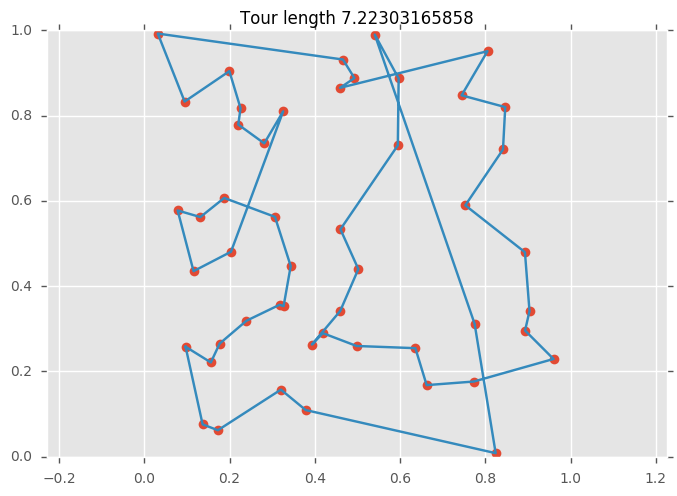

<function __main__.plot_tour>

In [12]:
int_slider = IntSlider(value=1, min=1, max=len(global_best_tour_lengths) - 1)
int_slider.layout.width = '70%'
interact(plot_tour, x=int_slider)

## <strike>The Future</strike> What future?!?!?!

### The Field

**TSPLIB:** SOLVED (and a 530 million city instance...)

**On P ?= NP** Graph Isomorphism in Quasipolynomial Time, László Babai, 2015

- https://arxiv.org/abs/1512.03547
- http://people.cs.uchicago.edu/~laci/2015-11-10talk.mp4

**Reinforcement learning** TSP for Multi-Armed Bandit problem? Thompson Sampling for TSP?

### For Colin
Travel a bit after graduation. Would love to work in baseball analytics.

### For Su
??? in Machine Learning

### For You
<br/>
#### ANTS CHALLENGE
Ants as tools to understand society

> The goal of this challenge is to generate algorithms that can:

> - identify and track individual ants over time

> - recognize when ants engage in food transfer

> ...

> $5000 if the L_1 score of the best submission reaches >= 95%

More information here: https://www.crowdai.org/challenges/ants-challenge-part-1

    https://github.com/constellationcolon/teaspoons

# Questions?